# 2. 머신러닝 프로젝트 처음부터 끝까지

## 2.1 실제 데이터로 작업하기
* 유명한 공개 데이터 저장소
    * UC 얼바인 머신러닝 저장소 (http://archive.ics.uci.edu/ml/)
    * Kaggle 데이터셋 (http://www.kaggle.com/datasets)
    * AWS 데이터 셋 (http://aws.amazon.com/ko/datasets)
* 메타 포털
    * http://dataportals.org/
    * http://opendatamonitor.edu/
    * http://quandl.com
*  인기 있는 공개 데이터
    * 위키백과 머신러닝 데이터셋 (https://goo.gl/SJHN2k)
    * Quaora.com (http://goo.gl/zDR78y)
    * subreddit ( http://www.reddit.com/r/datasets)

<img src="https://drive.google.com/uc?id=14VANECRCG0jphhD6lb0cD3hlDmQi_AYj" width="400">
<div class="caption" style='text-align:center'>2-1 캘리포니아 주택 가격</div>

이 장에서는 StatLib 저장소에 있는 **"캘리포니아 주택 가격"** 데이터 셋을 사용. <br>
1990년 캘리포니아 인구조사 데이터를 기반으로 교육 목적으로 사용하기 위해 범주형 특징을 추가하고 몇 개의 특성은 제외함.

## 2.2 큰 그림 보기
데이터는 블록 그룹(지리적 단위 = 구역)별 인구, 중간 소득, 중간 주탁 가격 등을 담고 있음.
#### [캘리포니아 주택 가격 모델 만들기] 데이터가 주어졌을 때  구역의 중간 주택 가격을 예측 하고자 함.

### 2.2.1 문제 정의
* (질문 1) 비즈니스의 목적이 정확히 무엇인가?
 * 문제를 어떻게 구성할지
 * 어떤 알고리즘을 선택할지
 * 모델 평가에 어떤 성능 지표를 사용할지
 * 모델 튜닝에 얼마나 노력을 투여할지

<img src="https://drive.google.com/uc?id=18JhHzFquFCWqRJr8GQ7xeIjsM8K-3Dxq" width="400">
<div class="caption" style='text-align:center'>2-2 부동산 투자를 위한 머신러닝 파이프라인</div>

위와 같이 **중간 주택 가격 예측** 결과를 다른 여러가지 신호(머신러닝에 주입하는 정보)와 함께 다른 머신러닝 시스템에 입력으로 사용되면 투자의 결정이 수익에 직결되기 때문에 올바르게 예측하는 것이 중요해짐. (사각형 각각이 서로 다른 머신러닝 시스템)

* (질문 2) 현재 솔루션은 어떻게 구성되어 있나?
 * 문제 해결 방법에 대한 정보
 * 참고 성능으로 활용
 
* (설계) 주택 가격 예측 모델
 * 문제 정의
  * 지도/비지도/강화 어떤 학습?
  * 분류/회귀/그외 ?
  * 배치/온라인 ?
 * 문제 정의 결과
  * 레이블 된 훈련 샘플이니 **지도 학습**
  * 값을 예측해야 하니 ** 회귀 문제 **
   * 구체적으로 특성이 여러개 이므로 ** 다변량(multivariate) 회귀 ** (1장에서는 GDP만 사용했으므로 ** 단변량 회귀** 였음.)
  * 데이터에 연속적인 흐름이 없으므로 ** 배치 학습 **
  
Tip. 데이터가 매우 크면 MapReduce를 사용하여 배치 학습을 여러 서버로 분할 하거나, 온라인 학습 기법을 사용할 수 있음

### 2.2.2 성능 측정 지표 선택
회귀 문제의 전형적인 성능 지표 **평균 제곱근 오차(RMSE)** 예측에 얼마나 많은 오류가 있는지 가늠
$$
RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2}
$$
> m은 RMSE 측정할 데이터셋에 있는 샘플 수 <br>
 $x^{(i)}$는 데이터셋에 있는 i번째 샘플의 전체 특성값의 벡터 <br>
$y^{(i)}$는 레이블 (해당 샘플의 기대 출력값) <br>
$X$는 모든 샘플의 모든 특성값을 포함하는 행렬 <br>
$h$는 예측 함수(가설) 이며, 샘플 특성 벡터 $x^{(i)}$를 받으면 예측값 $\widehat{y}^{(i)}=h(x^{(i)})$ 을 통해 예측 오차 $\widehat{y}^{(i)}-y^{(i)}$ 를 구함 <br>

경우에 따라 다른 함수를 사용함. 이상치로 보이는 구역이 많은 경우 **평균 절대 오차(MAE)**
$$
MAE(X,h)=\frac{1}{m}\sum_{i=1}^m \left\vert(h(x^{(i)})-y^{(i)})\right\vert
$$

RMSE와 MAE 모두 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법.
> RMSE 계산은 유클리디안 노름에 해당. $l_2$ 노름이라고도 부르며 $\lVert \cdot \rVert_2$ 또는 $\lVert \cdot \rVert$로 표기 <br>
 MAE 계산은 맨해튼 노름에 해당하며, $l_1$ 노름이라고 부르고  $\lVert \cdot \rVert_1$으로 표기 <br>
 원소가 $n$개인 벡터 v의 $l_k$ 노름은 $\lVert v \rVert_k = {( \left\vert v_0 \right\vert^k + \left\vert v_1 \right\vert^k + \cdots  + \left\vert v_n \right\vert^k )^{\frac{1}{k}}}$으로 정의, $l_0$은 벡터에 있는 0이 아닌 원소의 수, $l_\infty$는 벡터에서 가장 큰 절대값<br>
 노름 지수가 클수록 큰 값의 원소에 치우치며 작은 값은 무시됨. 즉, RMSE이 MAE보다 조금 더 이상치에 민감함. 하지만, 이상치가 드물면 RMSE가 잘맞아 일반적으로 널리 사용.
 
### 2.2.3 가정 검사
만든 가정을 나열하고 검사. <br>
만약, 하위 시스템에서 가격이 아닌 카테고리(저렴,보통,고가)로만 사용한다면 위 문제들은 회귀가 아닌 분류로 변함.

## 2.3 데이터 가져오기
### 2.3.1 작업환경 만들기
작업 디렉토리 만들기 <br>
```$ export ML_PATH="\$HOME/ml" # 작업디렉토리 설정
$ mkdir -p $ML_PATH
#패키지 설치
$ pip3 install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn
주피터 실행
$ jupyter notebook
```

<img src="https://drive.google.com/uc?id=1FAku0Yd8e5M0tcO7iWaGvTSZOZaAV1k6" width="400">
<div class="caption" style='text-align:center'>2-3 주피터 작업공간</div>

<img src="https://drive.google.com/uc?id=1cFyJyTi9R0ibPLVdo58i_RQaFU3Hug_1" width="400">
<div class="caption" style='text-align:center'>2-4 Hello world 주피터 노트북</div>

### 2.3.2 데이터 다운로드

In [2]:
# 현재 작업 공간에 datasets/housing에 housing.tgz를 내려받고 압축을 풀어 housing.csv 파일을 만듬.
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [3]:
# housing.csv 파일을 판다스의 데이터프레임 객체로 읽음.
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


각 행은 하나의 구역을 나타냄. 특성은 10개.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


데이터셋에는 20,640개의 샘플이 있으며, total_bedrooms는 207개 구역 값이 null임. 이 문제는 추후 적절히 처리할 예정.<br>
ocean_proximity 필드만 빼고 모두 숫자형, ocean_proximity는 head에서 볼 수 있듯이 텍스트 이며, 같은 값이 반복되는 것을 보아 범주형으로 보임. 

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

ocean_proximity는 5개의 카테고리가 있고, 각 카테고리마다 위와 같이 구성 됨.

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


위를 통해 숫자형 특성의 요약 정보를 보여줌.<br>
null 값은 제외하고 보여주며, count, mean, mix, max, std(표준편차), 백분위수(25%,50%,75%)을 나타냄.

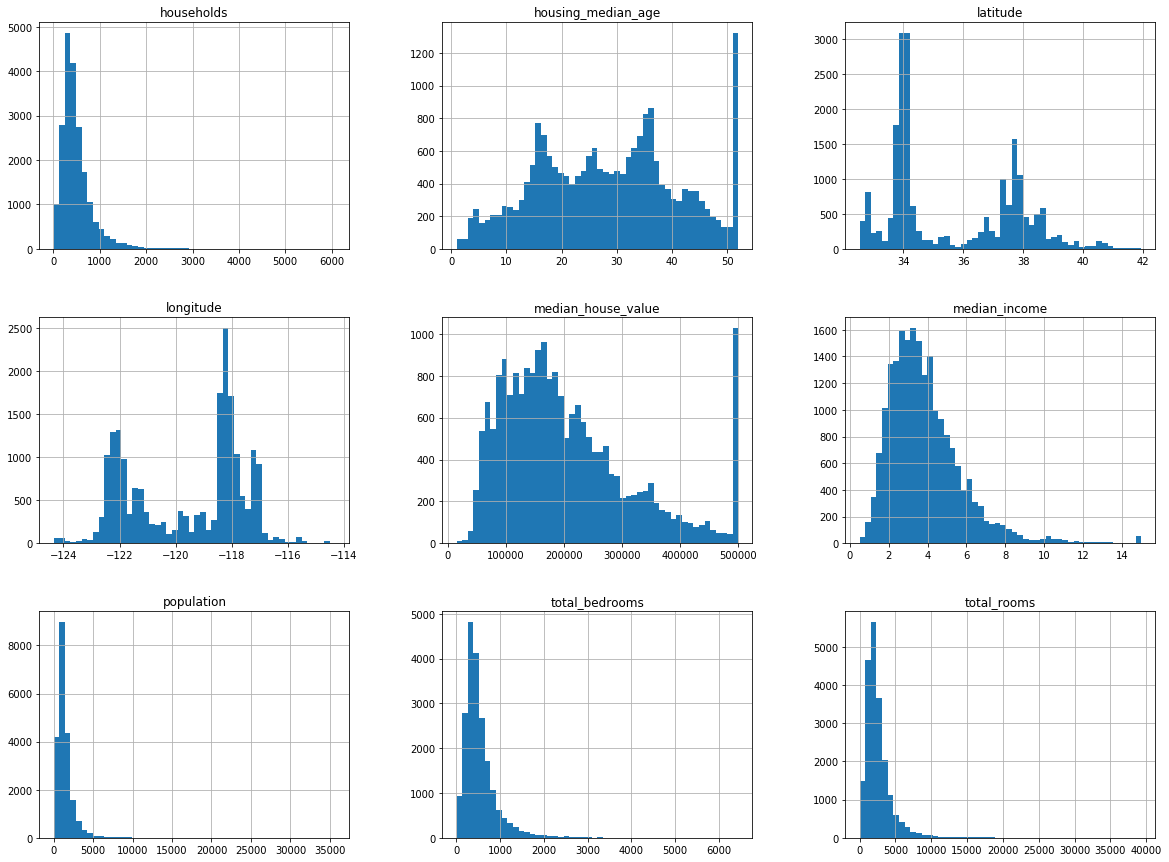

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

히스토그램은 x축에 값의 범위, y축에 샘플 수를 나타냄. <br>
특성마다 따로 그릴 수도 있고, 전체 셋에 대해 hist() 메서드를 호출하면 모든 숫자형 특성에 대한 히스토그램을 출력함. <br>
bins : x축 구간 개수, figsize : 그림 크기

위 히스토그램에서 몇가지 사항 확인 가능
>* median_income이 US 달러로 표현되어 있지 않음. 스케일을 조정하고, 상한이 15이고 하한이 0.5가 되도록 전처리되어 있음.
>* housing_median_age, median_house_value는 최대값과 최소값을 한정되어 있음. <br>
  median_house_value는 lable 값으로 결과를 사용할 팀과 함께 검토가 필요함.
>* 특성들의 스케일이 서로 많이 다름.
>* 히스토리의 꼬리가 두꺼움. 좀 더 종 모양의 분포가 되도록 변형될 필요가 있음.


### 2.3.4 테스트 세트 만들기

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set , test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

test_set.head()

16512 train + 4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8912,-118.49,34.02,30.0,2075.0,687.0,1026.0,592.0,3.1635,366700.0,<1H OCEAN
6039,-117.73,34.07,33.0,1025.0,261.0,854.0,269.0,2.2596,119400.0,INLAND
4990,-118.31,33.99,48.0,2235.0,433.0,1363.0,433.0,1.6559,101400.0,<1H OCEAN
15601,-116.79,32.84,12.0,4281.0,786.0,1891.0,721.0,3.5769,231800.0,<1H OCEAN
12345,-116.49,33.82,27.0,3316.0,636.0,2362.0,532.0,2.9569,65900.0,INLAND


간단히 20프로 데이터를 test 셋으로 나누는건 위와 같다. 하지만, 다시 실행할때 마다 다른 test 셋이 만들어지기 때문에, 반복시 결국 전체를 Test 셋으로 사용한 것.<br>
해결1 : 처음 실행할때 테스트 세트를 저장하고 다음번 실행에서 저장한 세트를 불러오도록 함. <br>
해결2 : 항상 같은 난수 인덱스가 생성되도록 np.random.permutation()을 호출 전에 난수 발생기 초기값을 지정. (np.random.seed(42))

두 해결법 모두 업데이트된 데이터셋 사용시 문제가 됨.<br>
일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하기.<br>
고유 식별자의 hash등을 이용해 테스트 세트 생성시 위 문제들이 해결됨.

In [11]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

하지만, 주택 데이터셋에는 식별자 컬럼이 없음. 그래서 행의 index를 id로 사용함.

In [12]:
housing_with_id  = housing.reset_index()   # `index` 열이 추가된 데이터프레임이 반환됩니다.
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


위의 경우 새 데이터는 데이터 셋의 끝에 추가되어야 하며, 어떤 행도 삭제되면 안됨.

이것이 불가능하면 다른 값을 연결하여 ID를 만듬 (위도+경도)

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


scikit-learn은 데이터 셋을 여러 서브셋으로 나누는 다양한 방법을 제공.
* train_test_split 함수
 * random_state 매개변수 : 난수 초기값 지정
 * 행의 개수가 같은 여러 데이터셋을 넘겨 같은 인덱스 기반으로 나눠 줌

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


위는 무작위 샘플링 방식. 데이터셋이 클때는 괜찮으나, 작으면 샘플링 편향이 생길 가능성이 있음.

계층적 샘플링 : 모수는 **계층(strata)**이라는 동질의 그룹으로 나뉘고, 테스트 셋이 각 계층에서 올바른 수의 샘플을 추출 하는 것.

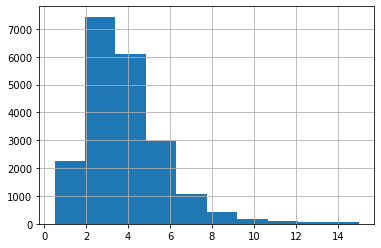

In [15]:
housing["median_income"].hist()

전문가가 median_income이 주택 가격 예측에 중요하다고 얘기했다고 가정하면, median_income(연속적인 숫자)을 카테고리 특성으로 만들어야 함.<br>
위를 보면 대부분 2~5에 모여 있지만 일부는 6을 넘기기도 함.<br>
계층별로 충분한 샘플 수가 있도록하여 작업함. median_income을 1.5로 나누고 반올림하여 카테고리화 하며, 5보다 큰 카테고리는 5로 합침.

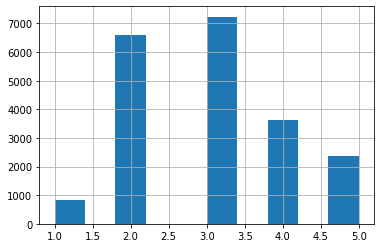

In [16]:
# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.# 소득 카테고 
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing["income_cat"].hist()

위에서 나눈 median_income 기반으로 계층 샘플링을 scikit-learn의 Stratified ShuffleSplit으로 함.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


무작위 샘플링과 계층적 샘플링을 비교하면 위와 같이 나옴<br>
무작위 샘플링의 경우 수입 카테고리별로 0~5프로까지 차이가 있었으며, 계층적 샘플링은 0.013~ 0.24까지 차이가 있었음.

In [19]:
# 샘플 원상 복귀
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 2.4 데이터 이해를 위한 탐색과 시각화

In [20]:
# 훈련세트 복사본 생성
housing =  strat_train_set.copy()

### 2.4.1 지리적 데이터 시각화

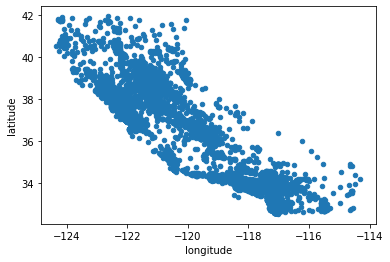

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

alpha를 주면 데이터 포인트가 밀집된 영역을 잘 표현함.

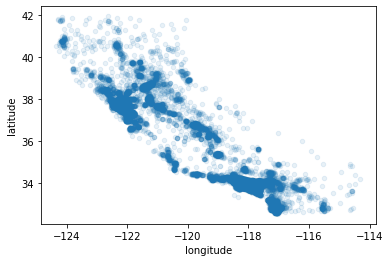

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

위와 같이 더 두드러진 패턴을 보려면 매개변수를 다양하게 조절해 봐야함.

median_house_value를 원의 반지름는 인구를 나타내고(매개변수 s), 색깔은 가격(매개변수 c)으로 파란색(낮은 가격)에서 빨간색(높은 가격)까지 범위를 가지는 jet을 사용(매개변수 cmap)하여 나타냄.

C:\Users\blue4\Anaconda3\envs\jay\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\blue4\Anaconda3\envs\jay\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\blue4\Anaconda3\envs\jay\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\blue4\Anaconda3\envs\jay\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


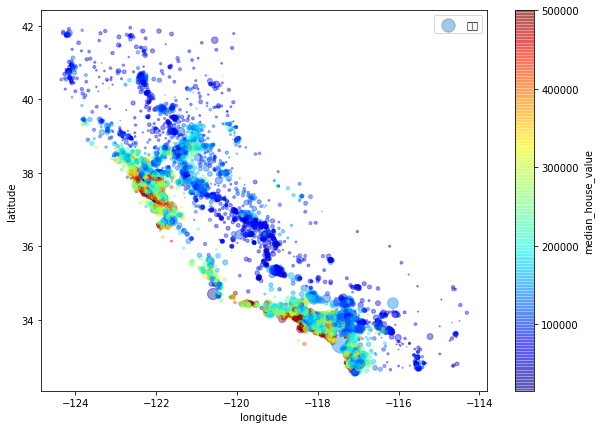

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

위 그림을 통해 주택 가격은 지역과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있다.<br>
위 내용은 군집 알고리즘을 사용해 주요 군집을 찾고 군집 중심까지 거리를 재는 특성을 추가할 때 도움이 됨.

### 2.4.2 상관관계 조사
데이터 셋이 크지 않으므로 모든 특성간의 **표준 상관계수**를 corr() 메서드를 이용해 쉽게 계산 가능.

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

상관관계의 범위는 -1부터 1까지. 1에 가까우면 강한 양의 상관관계, -1에 가까우면 강한 음의 상관 관계

<img src="https://drive.google.com/uc?id=192KntDDC48l7A0IPY_lIRBLzvAerwV4f" width="400">
<div class="caption" style='text-align:center'>2-14 여러가지 데이터 셋에 나타난 표준 상관 계수</div>
> 상관계수는 선형적인 상관관계만 측정.<br>
즉, 마지막 줄과 같이 비선형적 관계는 독립적이지 않음에도 0으로 나옴.<br>
상관계수와 기울기는 상관없음.

상관관계 확인하는 다른 방법은 숫자형 특성 사이에 산점도를 그려주는 판다스의 scatter_matrix 함수를 사용하는 것

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B5EAAC198>,
      dtype=object)

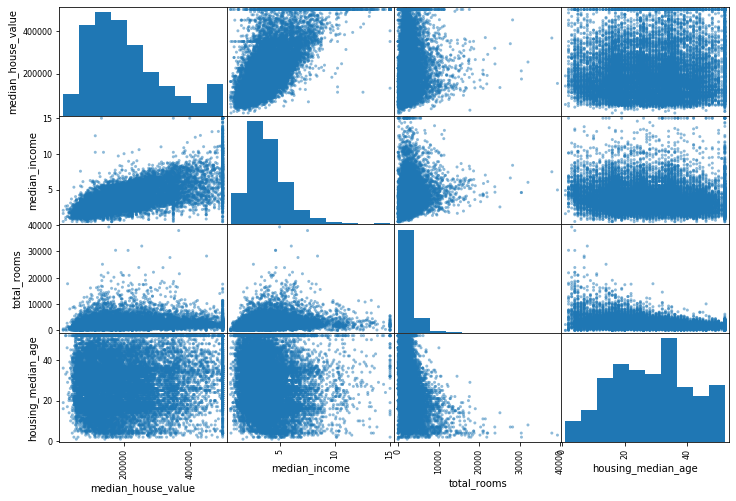

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

대각선 방향은 변수 자신의 것이라 그냥 직선이 되므로 히스토그램으로 표현됨.

[0, 16, 0, 550000]

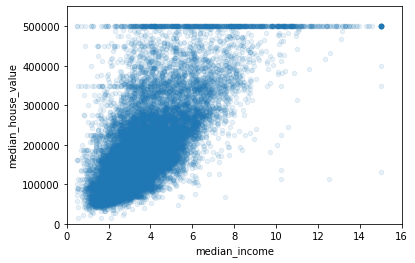

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

> 상관관계가 매우 강함 <br>
> 제한한 \$500,000에서 수평선으로 잘 보임. <br>
> \$450,000 근처에도 보이고, \$350,000와 \$280,000에도 있음. 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋음

### 2.4.3 특성 조합으로 실험
> 특정 구역의 방 개수는 얼마나 많은 가구수가 있는지 모른다면 그다지 유용하지 않음. 비슷하게 침대 개수도 유용하지 않음.

In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [29]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

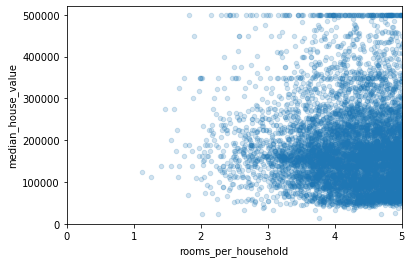

In [30]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


bedrooms_per_room 특성은 total_rooms, total_bedrooms보다 높은 상관관계를 보임. rooms_per_household도 더 높은 상관관계를 보였음.

## 2.5 머신러닝 알고리즘을 위한 데이터 준비
* 함수를 만들어 자동화해야 하는 이유
 * 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있음.
 * 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축
 * 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는데 재사용 가능
 * 여러가지 데이터 변환을 쉽게 시도해 볼 수 있으며 어떤 조합이 좋은지 확인하는데 편리

In [32]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

### 2.5.1 데이터 정제
머신러닝 알고리즘은 누락된 특성을 다루지 못하므로 처리를 위한 함수를 몇개 만듬.
* 해당 구역을 제거
* 전체 특성을 삭제
* 어떤 값으로 채움 (0, 평균, 중간값 등.)

In [33]:
sample_incomplete_rows  = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [34]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1 : NaN만 제거

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [35]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2 : 해당 feature 제거

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [36]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3 : 중앙값으로 대체
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


옵션 3에서 중앙값을 저장해놓고 시스템 평가시 테스트 세트에 있는 누락된 값에 적용해야하며, 새로운 데이터에서 누락된 값에도 적용해야함.

scikit-learn의 Imputer는 누락된 값을 손쉽게 다루도록 함.

In [37]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

C:\Users\blue4\Anaconda3\envs\jay\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
housing_num = housing.drop('ocean_proximity', axis=1) # 수치형 특성에만 적용가능 함으로 텍스트 특성은 제외함

In [39]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [40]:
imputer.statistics_ # 각 특성의 중간값을 계산해서 statistics_ 객체에 저장함.

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
housing_num.median().values # 위와 같음을 볼 수 있음.

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [42]:
X = imputer.transform(housing_num) # imputer 객체를 사용해 훈련 세트에서 누락된 값을 중간값으로 변경 (return numpy)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index = list(housing.index.values)) # pandas 데이터프레임으로 변경

In [43]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


#### scikit-learn의 설계 철학
* 일관성 : 객체가 일관되고 단순한 인터페이스 사용
     * 추정기(estimator) : 데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체.
         * fit() 메서드에 의해 수행되고 하나의 매개변수로 하나의 데이터셋만 전달함.
         * 추정 과정에서 필요한 다른 매개변수들은 모두 하이퍼파라미터로 간주되고, 인스턴스 변수로 저장됨.
     * 변환기(transformer) : 데이터셋을 변환하는 추정기
         * 데이터셋을 매개변수로 전달받은 transform() 메서드가 수행하며 변환된 데이터셋을 반환
         * fit_transform() : fit()와 transform()을 연달아 호출하는 것과 동일하며 최적화 되어 있어 빠름.
     * 예측기(predictor) : 데이터셋에 대해 예측을 만듬
          * predict() 메서드는 새로운 데이터셋을 받아 예측값을 반환함.
          * 테스트 세트를 사용해 예측 품질을 측정하는 score() 메서드를 가짐.
* 검사 가능 : 추정기의 하이퍼파라미터는 public 인스턴스 변수로 직접 접근 가능(imputer.strategy). 학습된 모델 파라미터도 접미사로 밑줄을 붙여 public 인스턴스 변수로 제공됨.(imputer.statistics_)
* 클래스 남용 방지 : numpy 배열이나 사이파이 희소행렬로 표현. 하이퍼파라미터는 문자열이나 숫자. 기존 구성요소를 최대한 재사용함.
* 합리적인 기본값 : 대부분의 매개변수에 합리적인 기본값을 지정해둠.

### 2.5.2 텍스트와 범주형 특성 다루기

In [44]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

pandas factorize() 메소드는 문자열 범주형 특성을 머신러닝 알고리즘이 다루기 쉬운 숫자 범주형 특성으로 변환

In [45]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [46]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각함.
원-핫 인코딩(one-hot encoding) : 카테고리별 이진 특성을 만들어 범주형 값을 대체함.

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\Users\blue4\Anaconda3\envs\jay\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

fit_transform() 메서드는 2차원 배열을 넣어야 하여 reshape를 함. (-1은 차원을 지정하지 않는다는 뜻, 해당 차원의 크기는 전체 배열에서 다른 차원이 정해지고 남은 크기가 됨.)<br>
출력은 sparse matrix이며 0을 모두 메모리에 저장하는 것은 낭비이므로 희소 행렬은 0이 아닌 원소의 위치만 저장.

In [48]:
housing_cat_1hot.toarray() # numpy array로 바꾸려면

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

CategoricalEncoder는 텍스트 카테고리를 숫자 카테고리로, 숫자 카테고리를 원-핫 벡터로 한번에 처리함.

In [60]:
# [PR #9151](https://github.com/scikit-learn/scikit-learn/pull/9151)에서 가져온 CategoricalEncoder 클래스의 정의.
# 이 클래스는 사이킷런 0.20에 포함될 예정입니다.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [61]:
#from sklearn.preprocessing import CategoricalEncoder # Scikit-Learn 0.20에서 추가 예정

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense") # dense matrix를 원할 경우.
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [63]:
cat_encoder.categories_ # 카테고리 리스트 확인

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

### 2.5.3 나만의 변환기
특별한 정제 작업이나 어떤 특성들을 조합하는 등의 작업을 위해 자신만의 변환기를 만들어야 할 때가 있음.<br>
이를 scikit-learn의 기능과 연동하고 싶을 때 **덕 타이핑(duck typing)**을 지원하므료 fit(), transform(), fit_transform() 메서드를 구현 하면됨.<br>
TransformerMixin을 상속하면 fit_transform()은 자동 생성 됨.<br>
BaseEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 두 메서드를 추가로 얻게 됨.

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [65]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs, 
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 2.5.4 특성 스케일
특성들이 스케일이 많이 다르면 잘 동작하지 않음.
* min-max 스케일링 (normalization) : 0~1 범위에 들도록 값을 이동($x'=\frac{x-min}{max-min}$)하고 스케일을 조정. scikit-learn MinMaxScaler 변환기 제공
* 표준화 (standardization) : $x'=\frac{x-\mu}{\sigma}$으로 분포의 분산이 1이 되도록 함. 범위의 상한, 하한은 없어 문제가 될 수 있으나, outliner에 영향을 덜 받음. sickit-learn StandardScaler

#### 모든 변환기에서 스케일링은 train set에만 fit() 적용, 그 다음 train set과 test set에 transform() 메서드를 사용해야 함.

### 2.5.5 변환 파이프라인
변환 단계가 많으며 순서대로 실행되어야 함.<br>
Pipeline 클래스 : 연속된 변환을 순서대로 처리할 수 있도록 도움

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [76]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

연속된 단계를 나타내는 이름/추정기 쌍의 목록을 입력으로 받음.<br>
마지막 단계에서 변환기와 추정기 모두 사용가능하며, 그 외에는 변환기만 가능.

In [68]:
# pandas DataFrame 컬럼의 일부를 선택하는 변환기를 만듬
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

DataFrameSelector를 통해 수치형 특성과 범주형 특성을 뽑아 파이프라인 처리가 각각 가능함.

In [69]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

위 두 파이프라인을 하나의 파이프라인으로 합치기 위해 **FeatureUnion** 사용

In [70]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [73]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [74]:
housing_prepared.shape #숫자형 11, one-hot 5

(16512, 16)

## 2.6 모델 선택과 훈련
### 2.6.1 훈련 세트에서 훈련하고 평가하기

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다.
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [79]:
print("레이블:", list(some_labels))

레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


scikit-learn의 mean_square_error 함수를 사용해 전체 훈련 세트에 대한 회귀 모델의 RMSE 측정

In [80]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

좋은 점수는 아님. 대부분 구역이 \$120,000 ~ \$265,000 이므로, 예측 오차가 \$68.628인 것은 매우 큼.<br>
훈련 데이터에 **과소적합**된 상태로 특성이 좋은 예측을 만들만큼 충분한 정보 제공을 못했거나, 모델이 강력하지 못하다는 것임.

모델을 DecisionTreeRegressor를 훈련시켜 복잡한 비선형 관계를 찾아보고자 함

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [82]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

오차가 0인 것으로 보아 **과대적합** 된 것으로 보임.<br>
따라서, 훈련 세트의 일부분으로 훈련 하고 다른 부분으로는 모델 검증이 필요함.

### 2.6.2 교차 검증을 사용한 평가

* K-겹교차 검증 (K-fold cross-validation) : fold라 불리는 10개의 서브셋으로 분리하여 10번 훈련하고 평가. 9개는 훈련에 1개는 평가에 사용.<br> scoring 매개변수는 클수록 좋음. 따라서, 평균 제곱 오차의 반대값을 계산하는 neg_mean_squared_error를 사용. 마지막에 -scores로 부호를 바꿈.

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [84]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [ 70232.0136482   66828.46839892  72444.08721003  70761.50186201
  71125.52697653  75581.29319857  70169.59286164  70055.37863456
  75370.49116773  71222.39081244]
평균: 71379.0744771
표준편차: 2458.31882043


선형 회귀를 했을때 평균 68628이었으므로 더 나쁘게 나왔음.<br>
교차 검증을 하게되면 모델의 성능 추정 뿐아니라 추정이 얼마나 정확한지 표준편차도 측정 가능함.

In [85]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
평균: 69052.4613635
표준편차: 2731.6740018


결정 트리 모델이 과대적합되어 선형 회귀 모델보다 성능이 나쁨<br>
RandomForestRegressor은 특성을 무작위로 선택해 많은 결정 트리를 만들고 그 예측을 평균 내는 방식으로 작동.<br>
여러 모델을 모아서 하나의 모델을 만드는 것을 **앙상블 학습**이라 하며 성능을 극대화 하는 방법 중 하나.

In [86]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [87]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

In [88]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [ 51650.94405471  48920.80645498  52979.16096752  54412.74042021
  50861.29381163  56488.55699727  51866.90120786  49752.24599537
  55399.50713191  53309.74548294]
평균: 52564.1902524
표준편차: 2301.87380392


훈련 세트에 대한 점수가 검증세트에 대한 점수보다 훨씬 낮으므로 여전히 과대적합되어 있음. <br>
모델을 간단히 하거나, 규제를 하거나, 더 많은 훈련 데이터를 모으는게 방법임. <br>
그러나, 하이퍼파라미터 조정에 너무 많은 시간을 쓰지 않고 다양한 모델을 시도해 보는게 좋음.

## 2.7 모델 세부 튜닝
가능성 있는 모델들을 추렸을 때, 이 모델들을 세부 튜닝하고자 함.

### 2.7.1 그리드 탐색
* GridSearchCV : 탐색하고자 하는 하이퍼파라미터와 시도해 볼 값을 지정하면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 통해 평가함.

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [94]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

63825.0479302 {'max_features': 2, 'n_estimators': 3}
55643.8429091 {'max_features': 2, 'n_estimators': 10}
53380.6566859 {'max_features': 2, 'n_estimators': 30}
60959.1388585 {'max_features': 4, 'n_estimators': 3}
52740.5841667 {'max_features': 4, 'n_estimators': 10}
50374.1421461 {'max_features': 4, 'n_estimators': 30}
58661.2866462 {'max_features': 6, 'n_estimators': 3}
52009.9739798 {'max_features': 6, 'n_estimators': 10}
50154.1177737 {'max_features': 6, 'n_estimators': 30}
57865.3616801 {'max_features': 8, 'n_estimators': 3}
51730.0755087 {'max_features': 8, 'n_estimators': 10}
49694.8514333 {'max_features': 8, 'n_estimators': 30}
62874.4073931 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54561.9398157 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59416.6463145 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52660.245911 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57490.0168279 {'bootstrap': False, 'max_features': 4, 'n_estima

RMSE 점수가 49694점으로 앞에서 한 52564보다 조금 더 좋음.

### 2.7.2 랜덤 탐색
하이퍼파라미터 **탐색 공간**이 커지면 RandomizedSearchCV를 사용하는게 나음.
* 랜덤 탐색을 1000회 반복하도록 실행시 하이퍼파라미터마다 각기 다른 1000개의 값을 탐색
* 반복 횟수를 조절하여 컴퓨터 자원 제어 가능

### 2.7.3 앙상블 방법
최상의 모델을 연결해보기! 모델의 그룹(앙상블)이 최상의 단일 모델보다 더 나은 성능을 보일때가 많음.

### 2.7.4 최상의 모델과 오차 분석
최상의 모델을 분석하면 좋은 통찰을 얻을 수 있다!

In [96]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([  7.33442355e-02,   6.29090705e-02,   4.11437985e-02,
         1.46726854e-02,   1.41064835e-02,   1.48742809e-02,
         1.42575993e-02,   3.66158981e-01,   5.64191792e-02,
         1.08792957e-01,   5.33510773e-02,   1.03114883e-02,
         1.64780994e-01,   6.02803867e-05,   1.96041560e-03,
         2.85647464e-03])

In [98]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.36615898061813418, 'median_income'),
 (0.16478099356159051, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.073344235516012421, 'longitude'),
 (0.062909070482620302, 'latitude'),
 (0.056419179181954007, 'rooms_per_hhold'),
 (0.053351077347675809, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.0028564746373201579, 'NEAR OCEAN'),
 (0.0019604155994780701, 'NEAR BAY'),
 (6.0280386727365991e-05, 'ISLAND')]

위 정보들을 바탕으로 덜 중요한 특성을 제외 할 수 있음. ( 작을 수록 덜 중요한 특성 )
### 2.7.5 테스트 세트로 시스템 평가하기
테스트 세트로 최종 모델 평가! 예측 변수와 레이블을 나눈 후 full_pipeline을 사용해 데이터를 변환하고 최종 평가

In [99]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [100]:
final_rmse

47766.003966433083

검증 세트보다 성능이 낮아졌더라도 하이퍼파라미터를 튜닝하면 안됨! 일반화가 어렵기 때문!

## 2.8 론칭, 모니터링, 그리고 시스템 유지 보수
* 모니터링 필요
* 시스템 성능 평가를 위해 시스템 예측을 샘플링해서 평가 -> 사람이 직접 분석
* 시스템 입력 데이터 품질 평가 -> 온라인 학습에서 특히 중요
* 새로운 데이터로 정기적인 모델 훈련 -> 백업도 가능하도록 해야함.